## Spotify top 200 analysis

I have compiled all of the 200 most listened to music lists per day from Spotify on Global from early 2017 to September 29, 2020.

I used python to get the information (https://github.com/ilitotor/spotifyAnalysis) and do the analysis and graphics production.

I investigated five questions below using this data. You can see everything in sequence below:

In [44]:
import pandas as pd
import numpy as np

df_top200 = pd.read_csv("top_global.zip", encoding='ISO-8859-1')


/Users/ilitotorquato/spotipy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
!pip install matplotlib seaborn --upgrade --quiet

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df_top200.describe()

,track_id,position,artist,name,streams,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,date
count,274859,274859,274841,274841,274859,274854,274854,274854,274854,274854,274854,274854,274854,274854,274854,274854,274854,274854,274859
unique,5770,401,980,4691,248639,5087,25,5,9,2322,1006,1127,1803,1322,4294,1534,1380,5152,1364
top,7qiZfU4dY1lWllzX7mPBI3,22,Ed Sheeran,Happier,streams,233713,1,1,4,0.163,0.752,0.557,0,0.106,-3.183,0.0432,0.446,95.977,date
freq,1361,1305,8629,1403,1259,1297,37669,152253,251485,1857,2387,1955,158923,5593,1297,2376,2471,1304,1259


### 1 -Top 10 Hot Artists

Which artists appeared the longest in the top 200. Ed Sheeran appeared 8629 on the list.

<AxesSubplot:title={'center':'Top 10 Hot Artists'}, xlabel="Artist's Name", ylabel='Times it appeared on the top 200 chart '>

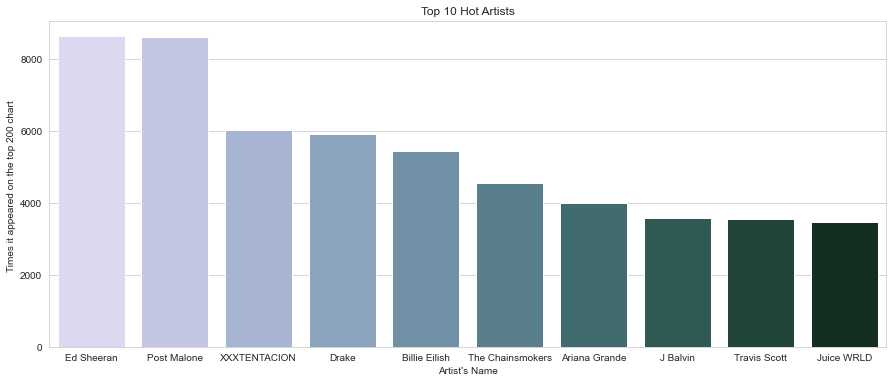

In [48]:
top_10_hot = df_top200.artist.value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
pal = sns.color_palette("Blues_d", 10)
sns.set_style("whitegrid")
plt.title('Top 10 Hot Artists')
plt.xlabel('Artist\'s Name')
plt.ylabel('Times it appeared on the top 200 chart ')
sns.barplot(x=top_10_hot.index, y=top_10_hot.values, palette="ch:2",)

### 2 -Top 10 Hot Musics

But the song that most appeared on the list is not Ed Sheeran's (he came in second). The most played song is Happier by DJ Marshmello, who was 1403 days on the list.

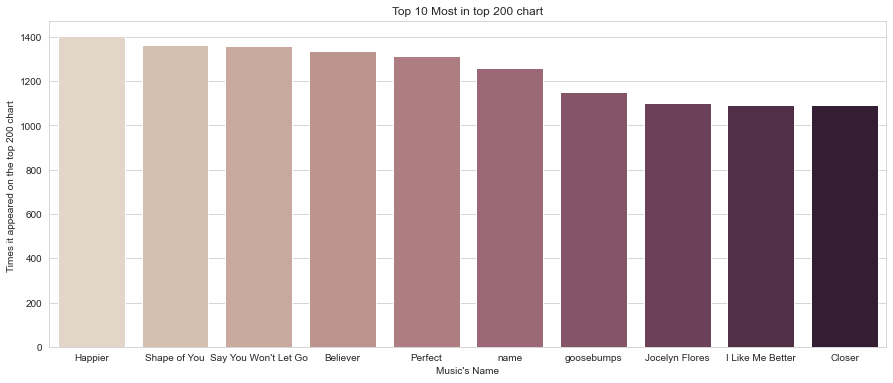

In [49]:
top_10_musics = df_top200.name.value_counts().nlargest(10)

plt.figure(figsize=(15, 6))
plt.xlabel('Music\'s Name')
plt.ylabel('Times it appeared on the top 200 chart ')
plt.title('Top 10 Most in top 200 chart')

sns.barplot(x=top_10_musics.index, y=top_10_musics.values, palette="ch:.25");

### 3 - TOP 10 songs ranked in 1st position most often
The song that stayed the longest in the first place was Dance Monkey by Tones and I.

In [50]:
#Problem with position 1 (strings and ints)
df_top200['position'] = df_top200['position'].apply(str)

<AxesSubplot:xlabel='Times it appeared 1st place ', ylabel='name,artist'>

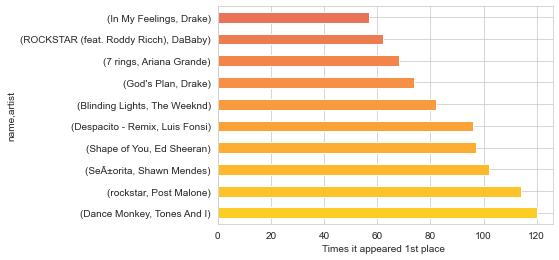

In [51]:
from matplotlib import cm
color = cm.plasma_r(np.linspace(.1, .9, 30))

first_position = df_top200[df_top200['position']=="1"]
plt.xlabel('Times it appeared 1st place ')
first_position.groupby('name').artist.value_counts().nlargest(10).plot(kind='barh' ,color=color)

### 4 - One Hit Wonder - 10 Artists has won a position on Top 200 chart just once
Artists who appeared on the list only once and never came back. They are known as one hit wonder`

<AxesSubplot:xlabel='date', ylabel='artist'>

<Figure size 1440x432 with 0 Axes>

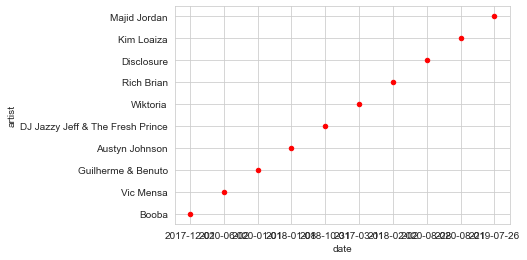

In [52]:
plt.figure(figsize=(20, 6))
one_hit_wonder = df_top200.drop_duplicates(subset=['artist'], keep=False)
one_hit_wonder = one_hit_wonder[['artist','date','name']].sort_values('name').head(10)
one_hit_wonder.values
one_hit_wonder.plot(kind='scatter',x='date',y='artist',color='red')

# 5 - Timeline of a great success
How was the trajectory of a great success. How did she switch positions during the days? Let's see the example of Shape Of You by Ed Sheeran

<AxesSubplot:xlabel='position', ylabel='date'>

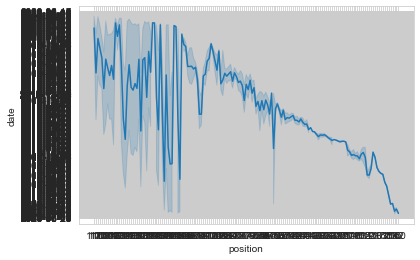

In [54]:
plt.figure(figsize=(20, 6))
shape_of_you = df_top200[df_top200['track_id'] == "7qiZfU4dY1lWllzX7mPBI3"]
sns.lineplot(data=shape_of_you, x="position", y="date")




REFERENCES

https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas

https://pbpython.com/pandas_dtypes.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

https://stackoverflow.com/a/38575399

https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/

https://queirozf.com/entries/pandas-dataframe-groupby-examples

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html